In [1]:
from google.colab import files
uploaded = files.upload()


Saving sample_healthcare_data.csv to sample_healthcare_data.csv


In [8]:
import pandas as pd
df = pd.read_csv("sample_healthcare_data.csv")  # Replace with the actual filename



Dataset Head:
   Patient_ID   Age  Gender  Blood_Pressure  Diabetes  Cholesterol_Level
0           1  25.0    Male           120.0       1.0              200.0
1           2  45.0  Female           130.0       0.0              190.0
2           3  50.0    Male             NaN       1.0              210.0
3           4   NaN     NaN           110.0       0.0                NaN
4           5  35.0  Female           140.0       1.0              180.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         20 non-null     int64  
 1   Age                15 non-null     float64
 2   Gender             17 non-null     object 
 3   Blood_Pressure     15 non-null     float64
 4   Diabetes           16 non-null     float64
 5   Cholesterol_Level  15 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory

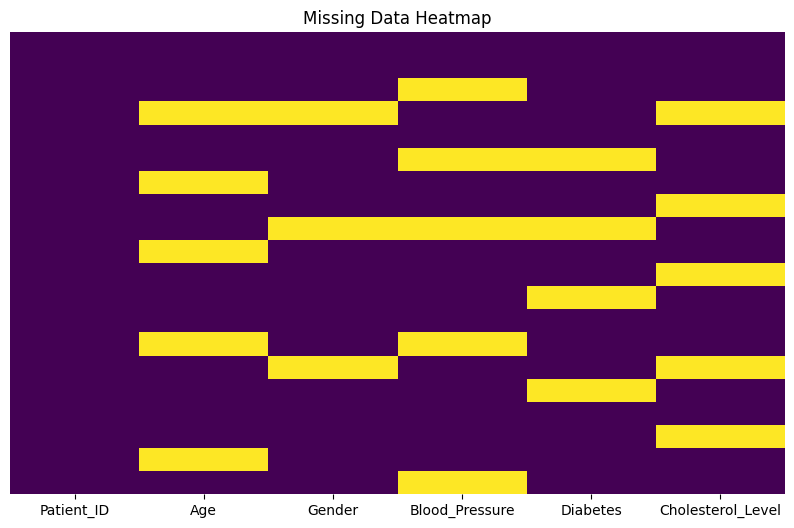

<ipython-input-9-fe28fed2d5c7>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Using median as an example
<ipython-input-9-fe28fed2d5c7>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val


Statistical Summary After Imputation:
       Patient_ID        Age  Blood_Pressure  Diabetes  Cholesterol_Level
count    20.00000  20.000000       20.000000  20.00000          20.000000
mean     10.50000  45.900000      125.950000   0.65000         204.750000
std       5.91608   9.048989        6.525053   0.48936          13.138433
min       1.00000  25.000000      110.000000   0.00000         180.000000
25%       5.75000  43.750000      123.500000   0.00000         197.250000
50%      10.50000  48.000000      126.000000   1.00000         205.000000
75%      15.25000  50.250000      128.500000   1.00000         212.750000
max      20.00000  60.000000      140.000000   1.00000         230.000000


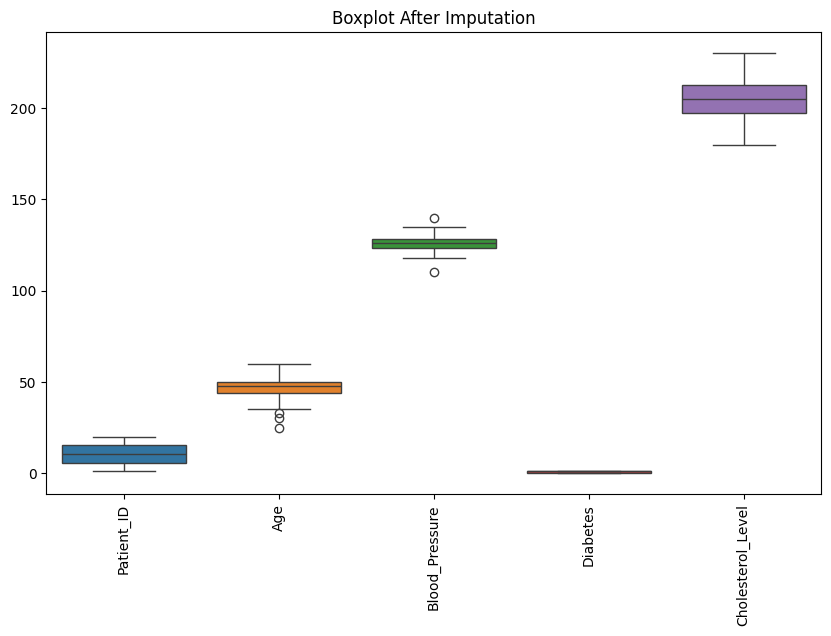

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv("sample_healthcare_data.csv")  # Replace with the actual file path

# Dataset Exploration
print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values Count:")
print(df.isna().sum())

# Percentage of missing values
missing_percentage = df.isna().mean() * 100
print("\nMissing Value Percentage:")
print(missing_percentage)

# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling Missing Data
# 1. Mean/Median Imputation for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)  # Using median as an example

# 2. Mode Imputation for categorical columns
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

# 3. KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_numeric = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])),
                          columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Replace original numerical columns with imputed values
df.update(df_numeric)

# 4. Regression Imputation (Example: Predicting missing values in a column)
def regression_impute(df, target_column):
    temp_df = df.copy()
    train_df = temp_df[temp_df[target_column].notna()]
    test_df = temp_df[temp_df[target_column].isna()]

    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_test = test_df.drop(columns=[target_column])

    model = LinearRegression()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)

    df.loc[df[target_column].isna(), target_column] = predicted_values

# Apply Regression Imputation (if applicable)
# regression_impute(df, 'column_name')  # Uncomment and replace 'column_name' with actual column

# Evaluating the effect of imputation
print("\nStatistical Summary After Imputation:")
print(df.describe())

# Visualization before & after imputation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot After Imputation")
plt.xticks(rotation=90)
plt.show()

# Save cleaned dataset
df.to_csv("cleaned_healthcare_data.csv", index=False)
